In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from collections import defaultdict

from scipy.optimize import curve_fit

import glob
from matplotlib.backends import backend_pdf


def load_files(runs, path="../calibrationdb/"):
    
    files = [ glob.glob(path+'backgroundphotons_run%d_*.csv'%run)[0] for run in runs ]
    df = pd.concat( [pd.read_csv(path+file, sep=',') for file in files ] )
    df=df.groupby("pmt").agg({'q':list, 'eq':list}).reset_index()
    
    return df


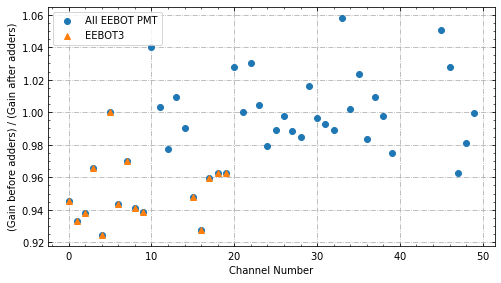

In [16]:
data = load_files( [7627, 7624] )

data["ratio"] = data.q.apply( lambda x : x[0]/x[1] ) 

pmts=[18,19, 15,16,17,0,1,2,3,4,5,6,7,8,9]
data["valid"] = data.pmt.isin(pmts)

plt.figure(figsize=(8, 4.4))
plt.plot(  data.pmt, data.ratio, 'o', label="All EEBOT PMT" )
plt.plot(  data[data.valid].pmt, data[data.valid].ratio, '^', label="EEBOT3" )
plt.xlabel("Channel Number")
plt.ylabel("(Gain before adders) / (Gain after adders)")
plt.legend()

#_sel = ( data.ratio < 0.8 ) | ( data.ratio > 0.95 ) 
#print(data[["pmt", "ratio", "q"]])

#plt.text( x=data[_sel].pmt.values, y=data[_sel].ratio.values, s=data[_sel].pmt.values )